# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vrontados
Processing Record 2 of Set 1 | margaret river
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | papatowai
Processing Record 5 of Set 1 | lambarene
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | hamilton
Processing Record 8 of Set 1 | oyem
Processing Record 9 of Set 1 | longyearbyen
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | sitangkai
Processing Record 12 of Set 1 | stanley
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | st. john's
Processing Record 15 of Set 1 | blackmans bay
Processing Record 16 of Set 1 | el galpon
Processing Record 17 of Set 1 | grytviken
Processing Record 18 of Set 1 | isafjordur
Processing Record 19 of Set 1 | choma
Processing Record 20 of Set 1 | veraval
Processing Record 21 of Set 1 | puerto natales
Processing Record 22 of Set 1 | blenheim
Processing Recor

Processing Record 41 of Set 4 | bazar-e yakawlang
City not found. Skipping...
Processing Record 42 of Set 4 | marquette
Processing Record 43 of Set 4 | bei'an
Processing Record 44 of Set 4 | remire-montjoly
Processing Record 45 of Set 4 | aykol
City not found. Skipping...
Processing Record 46 of Set 4 | suomussalmi
Processing Record 47 of Set 4 | el tigre
Processing Record 48 of Set 4 | kingston
Processing Record 49 of Set 4 | palikir - national government center
Processing Record 0 of Set 5 | vodnyy
Processing Record 1 of Set 5 | tobelo
Processing Record 2 of Set 5 | porto franco
Processing Record 3 of Set 5 | queenstown
Processing Record 4 of Set 5 | sur
Processing Record 5 of Set 5 | brokopondo
Processing Record 6 of Set 5 | parun
Processing Record 7 of Set 5 | quellon
Processing Record 8 of Set 5 | kivertsi
Processing Record 9 of Set 5 | namibe
Processing Record 10 of Set 5 | boa vista
Processing Record 11 of Set 5 | mount vernon
Processing Record 12 of Set 5 | taro
Processing Reco

Processing Record 35 of Set 8 | sault ste. marie
Processing Record 36 of Set 8 | magadan
Processing Record 37 of Set 8 | sept-iles
Processing Record 38 of Set 8 | lamu
Processing Record 39 of Set 8 | poronaysk
Processing Record 40 of Set 8 | mambajao
Processing Record 41 of Set 8 | vingt cinq
City not found. Skipping...
Processing Record 42 of Set 8 | den burg
Processing Record 43 of Set 8 | sa pa
Processing Record 44 of Set 8 | acarau
Processing Record 45 of Set 8 | chegdomyn
Processing Record 46 of Set 8 | laungowal
Processing Record 47 of Set 8 | belmonte
Processing Record 48 of Set 8 | lumut
Processing Record 49 of Set 8 | hantsavichy
Processing Record 0 of Set 9 | rouissat
Processing Record 1 of Set 9 | businga
Processing Record 2 of Set 9 | dongola
Processing Record 3 of Set 9 | ondjiva
Processing Record 4 of Set 9 | cooma
Processing Record 5 of Set 9 | springbok
Processing Record 6 of Set 9 | abu zabad
Processing Record 7 of Set 9 | vilyuysk
Processing Record 8 of Set 9 | komats

Processing Record 23 of Set 12 | port blair
Processing Record 24 of Set 12 | gombong
Processing Record 25 of Set 12 | astrakhan
Processing Record 26 of Set 12 | shimoda
Processing Record 27 of Set 12 | san jose village
City not found. Skipping...
Processing Record 28 of Set 12 | salym
Processing Record 29 of Set 12 | newport
Processing Record 30 of Set 12 | puerto leguizamo
Processing Record 31 of Set 12 | rikaze
Processing Record 32 of Set 12 | saint-joseph
Processing Record 33 of Set 12 | oyo
Processing Record 34 of Set 12 | tsengel
Processing Record 35 of Set 12 | kuala belait
Processing Record 36 of Set 12 | rawson
Processing Record 37 of Set 12 | dwarka
Processing Record 38 of Set 12 | viligili
City not found. Skipping...
Processing Record 39 of Set 12 | kokstad
Processing Record 40 of Set 12 | tevriz
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vrontados,38.4089,26.1328,286.39,74,75,1.90,GR,1702253990
1,margaret river,-33.9500,115.0667,292.56,35,0,4.90,AU,1702253991
2,bethel,41.3712,-73.4140,288.27,89,100,3.60,US,1702253856
3,papatowai,-46.5619,169.4708,289.61,46,41,4.67,NZ,1702253994
4,lambarene,-0.7001,10.2406,297.59,94,98,0.90,GA,1702253995


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vrontados,38.4089,26.1328,286.39,74,75,1.90,GR,1702253990
1,margaret river,-33.9500,115.0667,292.56,35,0,4.90,AU,1702253991
2,bethel,41.3712,-73.4140,288.27,89,100,3.60,US,1702253856
3,papatowai,-46.5619,169.4708,289.61,46,41,4.67,NZ,1702253994
4,lambarene,-0.7001,10.2406,297.59,94,98,0.90,GA,1702253995


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

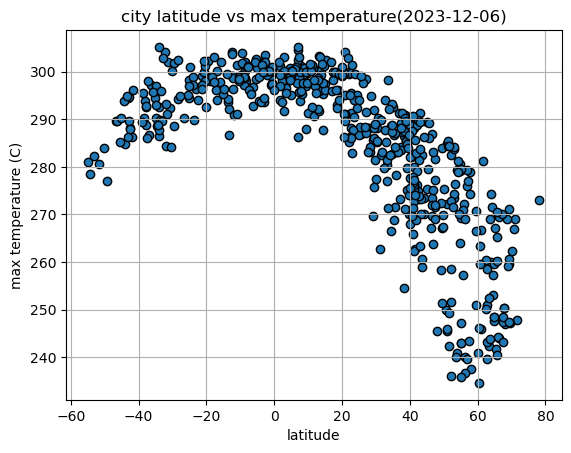

In [8]:
# Build scatter plot for latitude vs. temperature

lat_temp_plt = plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("latitude")
plt.ylabel("max temperature (C)")
plt.title("city latitude vs max temperature(2023-12-06)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

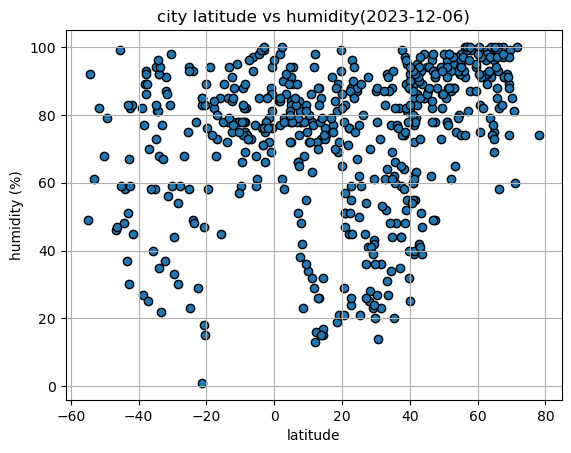

In [9]:
# Build scatter plot for latitude vs. humidity

lat_hum_plt = plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("latitude")
plt.ylabel("humidity (%)")
plt.title("city latitude vs humidity(2023-12-06)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

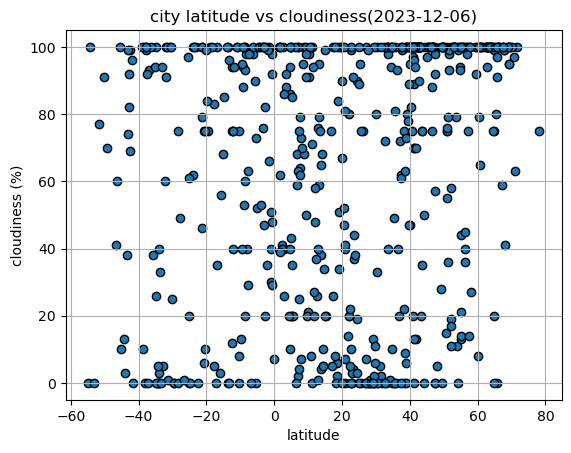

In [10]:
# Build scatter plot for latitude vs. cloudiness

lat_cloud_plt = plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("latitude")
plt.ylabel("cloudiness (%)")
plt.title("city latitude vs cloudiness(2023-12-06)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

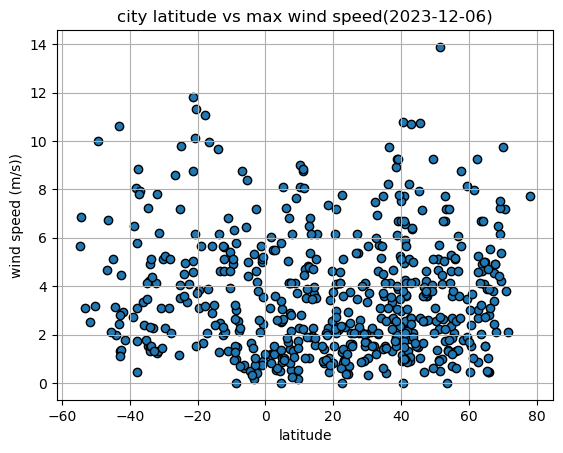

In [11]:
# Build scatter plot for latitude vs. wind

lat_wind_plt = plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("latitude")
plt.ylabel("wind speed (m/s))")
plt.title("city latitude vs max wind speed(2023-12-06)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [30]:
# Define a function to create Linear Regression plots

def lin_regress_plots(x_values, y_values, eq_x, eq_y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, (eq_x, eq_y), fontsize=15, color="red")
    print(f"the r-value is: {rvalue**2}")
    return


In [31]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vrontados,38.4089,26.1328,286.39,74,75,1.90,GR,1702253990
2,bethel,41.3712,-73.4140,288.27,89,100,3.60,US,1702253856
6,hamilton,39.1834,-84.5333,275.12,81,100,6.69,US,1702253952
7,oyem,1.5995,11.5793,294.10,98,100,1.21,GA,1702253999
8,longyearbyen,78.2186,15.6401,273.06,74,75,7.72,SJ,1702254001


In [32]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,margaret river,-33.9500,115.0667,292.56,35,0,4.90,AU,1702253991
3,papatowai,-46.5619,169.4708,289.61,46,41,4.67,NZ,1702253994
4,lambarene,-0.7001,10.2406,297.59,94,98,0.90,GA,1702253995
5,adamstown,-25.0660,-130.1015,294.41,58,0,3.53,PN,1702253819
9,port-aux-francais,-49.3500,70.2167,277.03,79,70,9.99,TF,1702253819


###  Temperature vs. Latitude Linear Regression Plot

the r-value is: 0.6795604758086409


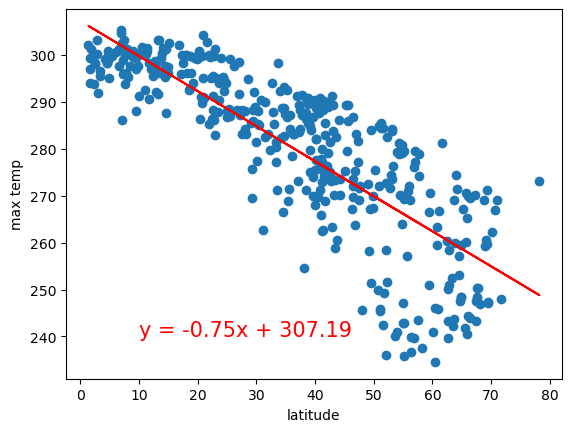

In [33]:
# Linear regression on Northern Hemisphere

lin_regress_plots(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 10, 240)
plt.xlabel("latitude")
plt.ylabel("max temp")
plt.show()

the r-value is: 0.4453609207880479


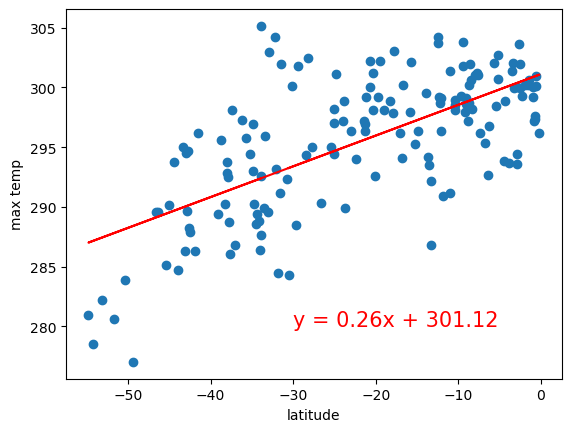

In [34]:
# Linear regression on Southern Hemisphere

lin_regress_plots(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], -30, 280)
plt.xlabel("latitude")
plt.ylabel("max temp")
plt.show()

**Discussion about the linear relationship:** 
    The correlation between latitude in the northern hemisphere and maximum temperature is moderately correlated (0.5 <= r < 0.7), and is weakly correlated (0.3 <= r < 5) in the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

the r-value is: 0.12709866980005888


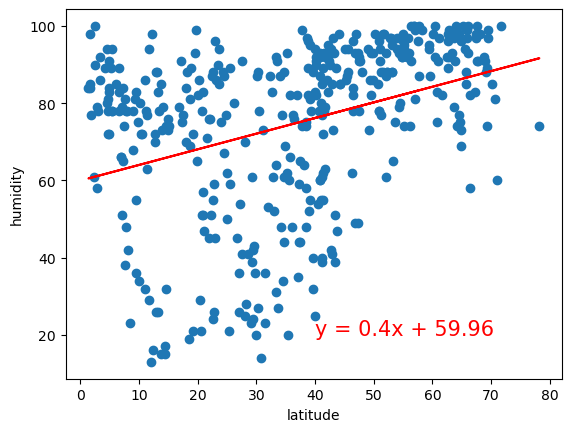

In [35]:
# Northern Hemisphere
lin_regress_plots(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 40, 20)
plt.xlabel("latitude")
plt.ylabel("humidity")
plt.show()

the r-value is: 0.07780002644433817


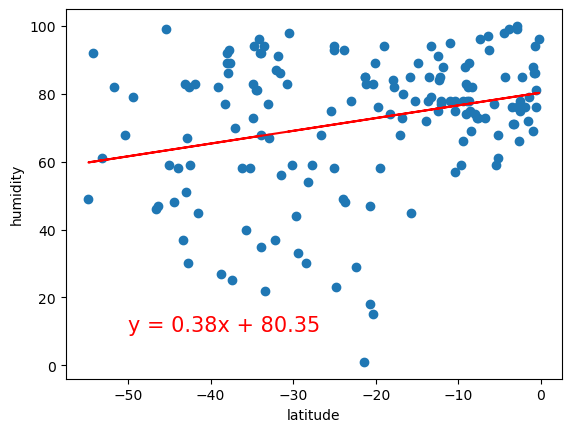

In [37]:
# Southern Hemisphere
lin_regress_plots(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], -50, 10)
plt.xlabel("latitude")
plt.ylabel("humidity")
plt.show()

**Discussion about the linear relationship:**
    The correlation between latitude in both the northern and southern hemispheres and humidity is very weakly/ not correlated (r < 0.3).

### Cloudiness vs. Latitude Linear Regression Plot

the r-value is: 0.09251953764215609


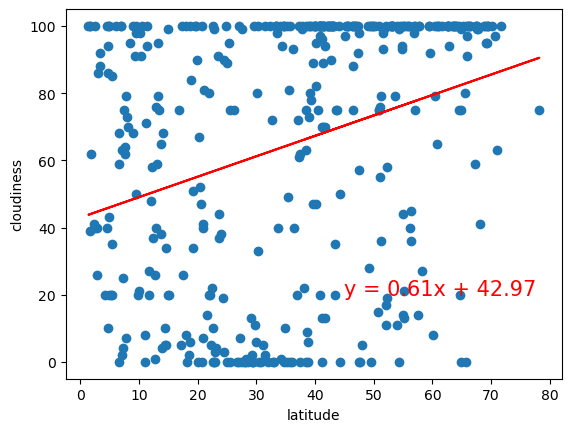

In [39]:
# Northern Hemisphere
lin_regress_plots(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 45, 20)
plt.xlabel("latitude")
plt.ylabel("cloudiness")
plt.show()

the r-value is: 0.01957843405163519


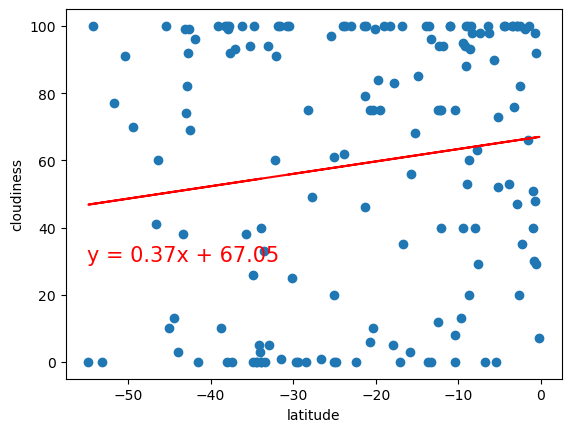

In [42]:
# Southern Hemisphere
lin_regress_plots(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], -55, 30)
plt.xlabel("latitude")
plt.ylabel("cloudiness")
plt.show()

**Discussion about the linear relationship:**
    The correlation between latitude in both the northern and southern hemispheres and cloudiness is very weakly/ not correlated (r < 0.3).

### Wind Speed vs. Latitude Linear Regression Plot

the r-value is: 0.022440889206339198


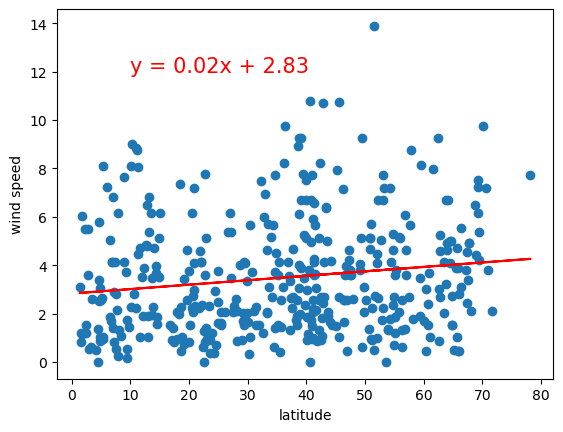

In [43]:
# Northern Hemisphere
lin_regress_plots(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 10, 12)
plt.xlabel("latitude")
plt.ylabel("wind speed")
plt.show()

the r-value is: 0.015871076440079332


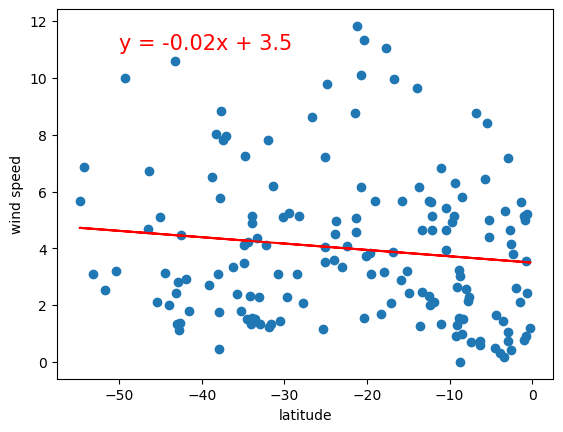

In [44]:
# Southern Hemisphere
lin_regress_plots(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], -50, 11)
plt.xlabel("latitude")
plt.ylabel("wind speed")
plt.show()

**Discussion about the linear relationship:** 
    The correlation between latitude in both the northern and southern hemispheres and wind speed is very weakly/ not correlated (r < 0.3).